In [5]:
import pandas as pd
import numpy as np

import datetime
from datetime import date,datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\hema.ramasamy\OneDrive - Uk Biocentre\Core\Analysis\RTB-NAF\Apr 2022\NIHR-NBC-RTB-NAF-DNA-Extraction-Report-202205051113.csv')
df

,Project,ParticipantID,ParentSampleID,SampleID,ProcessedDateTime,SourceSampleType,Method,AliquotCount,Volume,VolumeUnit,Concentration,ConcentrationUnit,Analyzer,OD260/280,OD260/230
0,RTB-NAF,F001475C,UKBC9003184_G07,4032458432,28/04/2022,Blood,Chemagen,1,150,ul,98.85,ng/ul,Trinean Dropsense,1.93,2.18
1,RTB-NAF,F001341G,UKBC9003184_E12,4032458470,28/04/2022,Blood,Chemagen,1,150,ul,97.06,ng/ul,Trinean Dropsense,2.00,2.40
2,RTB-NAF,F001289A,UKBC9003186_G02,4017149207,29/04/2022,Blood,Chemagen,1,150,ul,107.66,ng/ul,Trinean Dropsense,2.09,2.63
3,RTB-NAF,F001330V,UKBC9003186_A06,4017149233,29/04/2022,Blood,Chemagen,1,150,ul,133.72,ng/ul,Trinean Dropsense,2.00,2.38
4,RTB-NAF,F001478F,UKBC9003254_G06,4017216247,19/04/2022,Blood,Chemagen,1,150,ul,104.18,ng/ul,Trinean Dropsense,1.94,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,RTB-NAF,F001792X,UKBC9003024_E04,4017165061,20/04/2022,Blood,Chemagen,1,150,ul,74.27,ng/ul,Trinean Dropsense,1.87,2.13
66,RTB-NAF,F001332X,UKBC9003184_A12,4032458466,28/04/2022,Blood,Chemagen,1,150,ul,79.01,ng/ul,Trinean Dropsense,2.04,2.01
67,RTB-NAF,F001447X,UKBC9003254_A04,4017216225,19/04/2022,Blood,Chemagen,1,150,ul,81.94,ng/ul,Trinean Dropsense,1.86,2.23
68,RTB-NAF,F001764R,UKBC9003178_C11,4017216475,19/04/2022,Blood,Chemagen,1,150,ul,67.41,ng/ul,Trinean Dropsense,1.89,2.14


In [8]:
df.columns

Index(['Project', 'ParticipantID', 'ParentSampleID', 'SampleID',
       'ProcessedDateTime', 'SourceSampleType', 'Method', 'AliquotCount',
       'Volume', 'VolumeUnit', 'Concentration', 'ConcentrationUnit',
       'Analyzer', 'OD260/280', 'OD260/230'],
      dtype='object')

In [9]:
df1 = df[['ParticipantID','ProcessedDateTime', 'OD260/280', 'OD260/230']]
df1

,ParticipantID,ProcessedDateTime,OD260/280,OD260/230
0,F001475C,28/04/2022,1.93,2.18
1,F001341G,28/04/2022,2.00,2.40
2,F001289A,29/04/2022,2.09,2.63
3,F001330V,29/04/2022,2.00,2.38
4,F001478F,19/04/2022,1.94,2.39
...,...,...,...,...
65,F001792X,20/04/2022,1.87,2.13
66,F001332X,28/04/2022,2.04,2.01
67,F001447X,19/04/2022,1.86,2.23
68,F001764R,19/04/2022,1.89,2.14


In [24]:
#df1 = df1.set_index('ProcessedDateTime')
df1 = df1.reset_index()
df1.head(2)

,index,ProcessedDateTime,ParticipantID,OD260/280,OD260/230
0,0,28/04/2022,F001475C,1.93,2.18
1,1,28/04/2022,F001341G,2.00,2.40


In [58]:
df2 = df1.groupby('ProcessedDateTime').count()
df2 = df2.sort_values(by = 'ProcessedDateTime').reset_index()
df2

,ProcessedDateTime,index,ParticipantID,OD260/280,OD260/230
0,11/4/2022,9,9,9,9
1,19/04/2022,22,22,22,22
2,20/04/2022,3,3,3,3
3,25/04/2022,2,2,2,2
4,28/04/2022,14,14,14,14
5,29/04/2022,7,7,7,7
6,5/4/2022,12,12,12,12
7,6/4/2022,1,1,1,1


In [59]:
df2.sort_values(by = 'ProcessedDateTime')

,ProcessedDateTime,index,ParticipantID,OD260/280,OD260/230
0,11/4/2022,9,9,9,9
1,19/04/2022,22,22,22,22
2,20/04/2022,3,3,3,3
3,25/04/2022,2,2,2,2
4,28/04/2022,14,14,14,14
5,29/04/2022,7,7,7,7
6,5/4/2022,12,12,12,12
7,6/4/2022,1,1,1,1


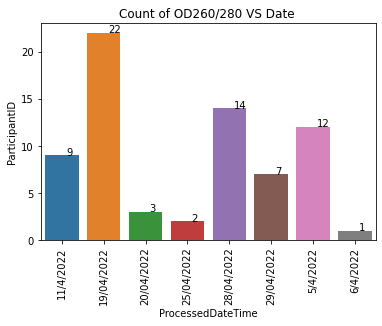

In [64]:
ax = sns.barplot(x='ProcessedDateTime',
                 y='ParticipantID',
                 data = df2,
                                 )
plt.xticks(rotation=90)
plt.title("Count of OD260/280 VS Date ")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()+0.02))

plt.show()

TypeError: object of type 'int' has no len()

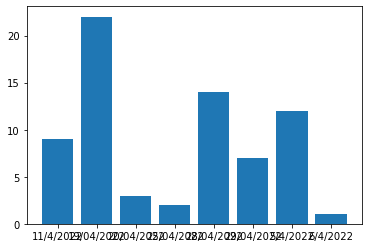

In [66]:
plt.bar(df2['ProcessedDateTime'],df2['ParticipantID'])
plt.xticks(90)